In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualiser les données
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
from sklearn.preprocessing import LabelEncoder
# package geo pour traiter les données coordinates
from geopy.geocoders import Nominatim
# Any results you write to the current directory are saved as output.

['knycmetars2016', 'nyc-taxi-trip-duration']


In [2]:
%matplotlib inline
sns.set({'figure.figsize':(16,8)})

# Data Loading

In [3]:
train = pd.read_csv("../input/nyc-taxi-trip-duration/train.csv")
test = pd.read_csv("../input/nyc-taxi-trip-duration/test.csv")

In [4]:
print(f"shape of training set{train.shape}")
print(f"shape of testing set{test.shape}")

shape of training set(1458644, 11)
shape of testing set(625134, 9)


1. ### Data Training vs Data testing:

In [5]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
print(f"La différence de la variable entre data training et data testing:\
{set(train.columns).difference(set(test.columns))}")

La différence de la variable entre data training et data testing:{'trip_duration', 'dropoff_datetime'}


# Data preprocessing:

 ### Valeur manquant: 

* dans data training:

In [8]:
for i,v in zip(list(train.isnull().sum().index),list(train.isnull().sum().values)):
    print(f"{i} a {v} valeur(s) manquant(s)")

id a 0 valeur(s) manquant(s)
vendor_id a 0 valeur(s) manquant(s)
pickup_datetime a 0 valeur(s) manquant(s)
dropoff_datetime a 0 valeur(s) manquant(s)
passenger_count a 0 valeur(s) manquant(s)
pickup_longitude a 0 valeur(s) manquant(s)
pickup_latitude a 0 valeur(s) manquant(s)
dropoff_longitude a 0 valeur(s) manquant(s)
dropoff_latitude a 0 valeur(s) manquant(s)
store_and_fwd_flag a 0 valeur(s) manquant(s)
trip_duration a 0 valeur(s) manquant(s)


* Dans data testing

In [9]:
for i,v in zip(list(test.isnull().sum().index),list(test.isnull().sum().values)):
    print(f"{i} a {v} valeur(s) manquant(s)")

id a 0 valeur(s) manquant(s)
vendor_id a 0 valeur(s) manquant(s)
pickup_datetime a 0 valeur(s) manquant(s)
passenger_count a 0 valeur(s) manquant(s)
pickup_longitude a 0 valeur(s) manquant(s)
pickup_latitude a 0 valeur(s) manquant(s)
dropoff_longitude a 0 valeur(s) manquant(s)
dropoff_latitude a 0 valeur(s) manquant(s)
store_and_fwd_flag a 0 valeur(s) manquant(s)


### Data duplicated

In [10]:
print(f"Il y a {train.duplicated().sum()} données duplicates dans le train")

Il y a 0 données duplicates dans le train


In [11]:
print(f"Il y a {test.duplicated().sum()} données duplicates dans le test")

Il y a 0 données duplicates dans le test


### Analyst descriptive

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


> Note: La data contient
-  1 varibale en type chaîne de caractère:`id`
- 2 variable en type date: `pickup_datetime`, `dropoff_datetime`
- 2 varible en type catégorie: `vendor_id`, `store_and_fwd_flag`
- 1 varible en type nombre continue: `trip_duration`
- 1 variable en type nombre nominal: `passenger_count`
- 4 variable en type coordinate: `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, `dropoff_latitude`

In [14]:
print(f"vendor_id ont {len(train.vendor_id.unique())} valeur: {list(train.vendor_id.unique())}")

vendor_id ont 2 valeur: [2, 1]


In [15]:
print(f"store_and_fwd_flag ont {len(train.store_and_fwd_flag.unique())} \
valeur: {list(train.store_and_fwd_flag.unique())}")

store_and_fwd_flag ont 2 valeur: ['N', 'Y']


In [16]:
print(f"passenger_count ont {len(train.passenger_count.unique())} \
valeur: {sorted(list(train.passenger_count.unique()))}")

passenger_count ont 10 valeur: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Data Exploration

## trip_duration distribution

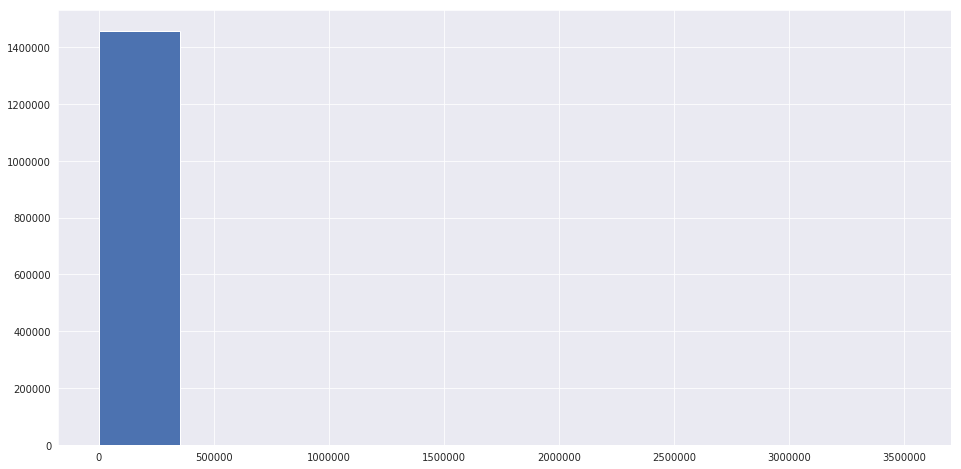

In [17]:
train.trip_duration.hist();

> Note: il nous semble que `trip_duration` contient certains valeur volumineux par rapport aux majorité de données

In [18]:
len(train.trip_duration[train.trip_duration>6000].values)

2567

- Il y a 2567 trip qui ont durés plus de 6000 seconde (une heure et demi)

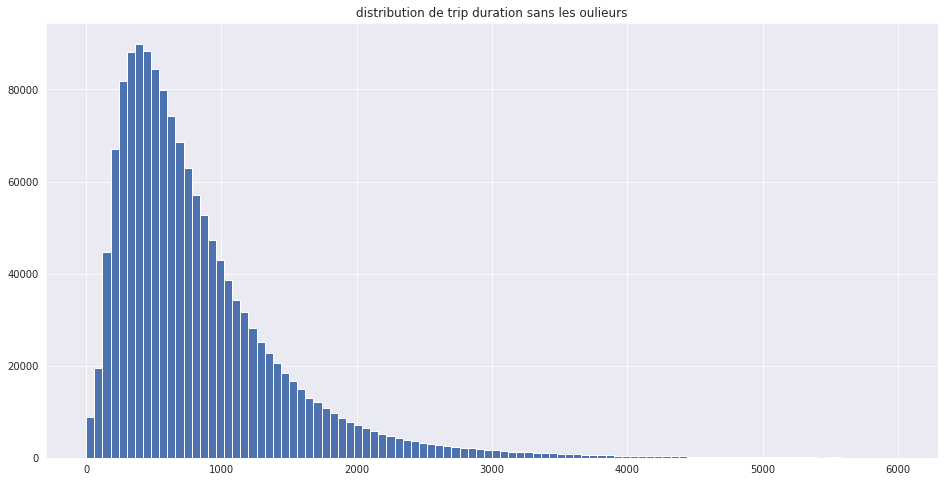

In [19]:
train.loc[train.trip_duration<6000,"trip_duration"].hist(bins=100)
plt.title("distribution de trip duration sans les oulieurs");

> Note: ça resemble la distribution log-normal

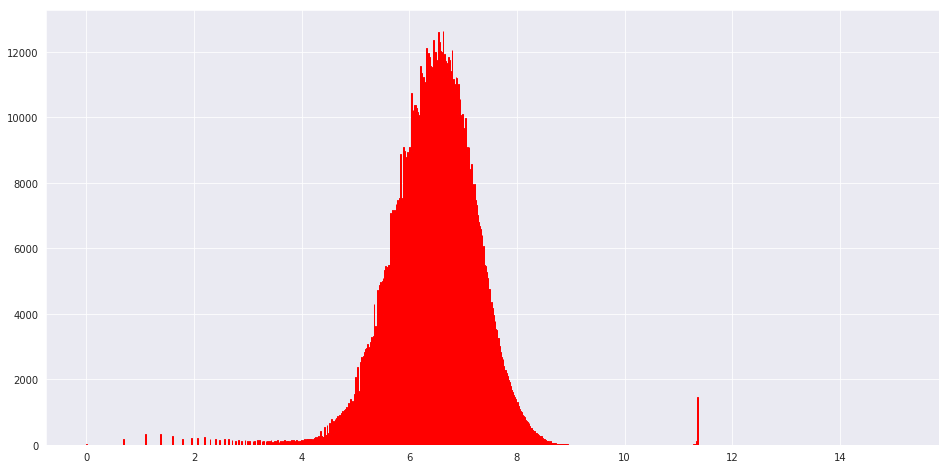

In [20]:
plt.hist(np.log(train.trip_duration), bins=1000, edgecolor='red');

la log- transformation de `trip_duration` resemble normal distribution

In [21]:
train['log_trip_duration'] = np.log(train['trip_duration'])

## Distribution de trip duration par rapport aux types de vendor

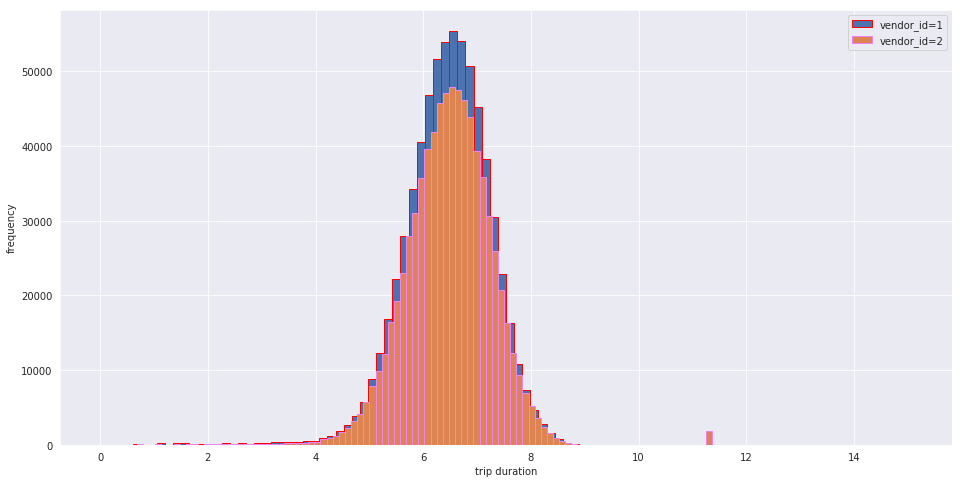

In [22]:
plt.hist(train.loc[train.vendor_id==1, 'log_trip_duration'], bins=100, edgecolor='red')
plt.hist(train.loc[train.vendor_id==2, 'log_trip_duration'], bins=100, edgecolor='violet')
plt.xlabel("trip duration")
plt.ylabel("frequency")
plt.legend(['vendor_id=1', 'vendor_id=2']);

> vendor 1 a plus de `trip_duration`que vendor 2

## passerger_count vs trip duration

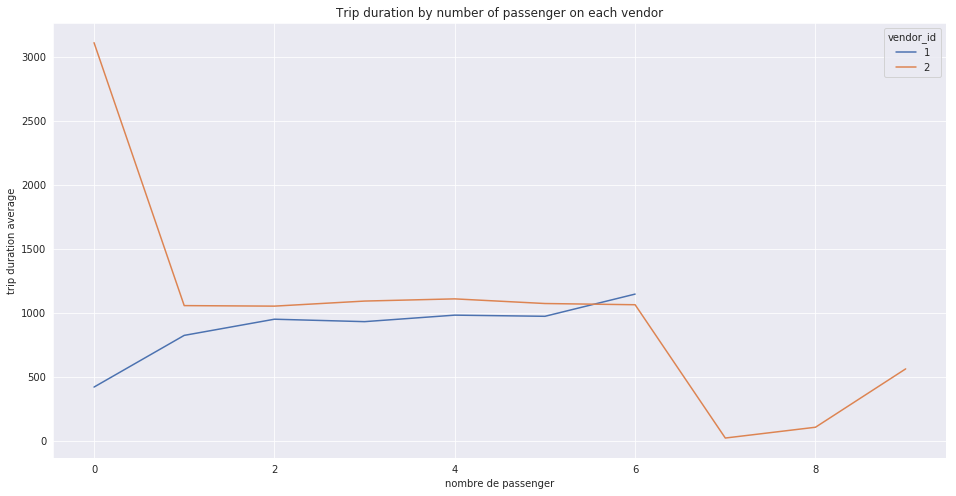

In [23]:
train.groupby(['vendor_id','passenger_count'])['trip_duration'].agg('mean').unstack(level=0).plot()
plt.ylabel("trip duration average")
plt.xlabel("nombre de passenger")
plt.title("Trip duration by number of passenger on each vendor");

> En moyenne: de 1 passenger à 6 passengers les deux vendors sont stables au niveau de trip duration

> un remarque: même s'il n'y a pas de passenger, le trip duration de vendor 2 a 50 mn, de vendor 1 a 6 mn

> vendor 1 a maximum 6 passengers, vendor 2 a plus de 6 mais le trip duration sont inférieur de 10 mn

In [24]:
train[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']].head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520


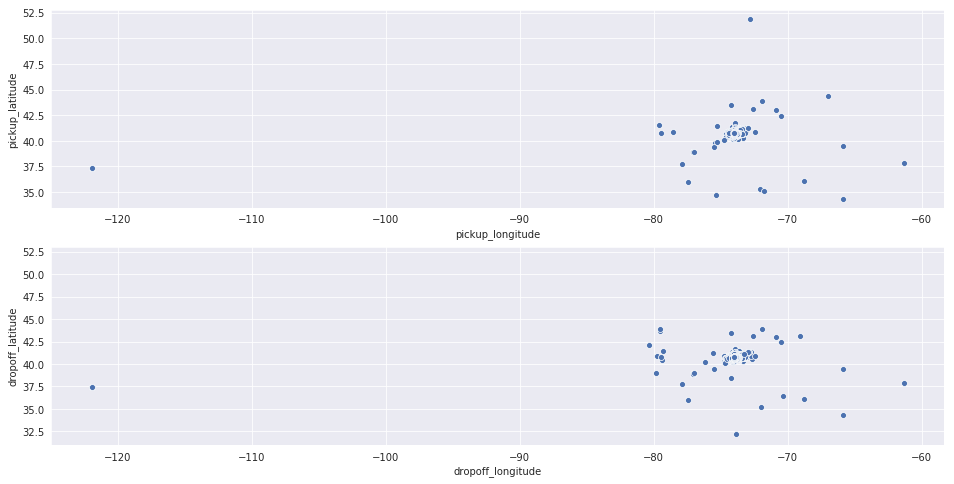

In [25]:
fig,ax = plt.subplots(2,1)
sns.scatterplot(x='pickup_longitude', y='pickup_latitude',data=train,ax=ax[0])
plt.ylim([31,53]);
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude',data=train,ax=ax[1])
plt.ylim([31,53]);

> On a vu que la majorité des trajets est concentré au longitude: -74 latitude: 42

# Features engineering

## 1.Features extraction

- Converter `store_and_fwd_flag` en chiffres

In [26]:
le = LabelEncoder()
le.fit(train['store_and_fwd_flag'])
train['store_and_fwd_flag'] = le.transform(train['store_and_fwd_flag'])
test['store_and_fwd_flag'] = le.transform(test['store_and_fwd_flag'])

## - Pour les dates:

In [27]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['month'] = train['pickup_datetime'].dt.month
train['day'] = train['pickup_datetime'].dt.day
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
train['weekday'] = train['pickup_datetime'].dt.weekday
train['hour'] = train['pickup_datetime'].dt.hour
train['minute'] = train['pickup_datetime'].dt.minute
#train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)

> Note: trip_duration est calculé par la différence entre pickup_datetime et dropoff_datetime

In [28]:
# petite verification
#train['check_trip_duration'] = (train['dropoff_datetime'] - train['pickup_datetime'])\
#                                    .map(lambda x: x.total_seconds())
#print(f"il y a {sum(train['check_trip_duration'] != train.trip_duration)} ligne(s) ne pas correspondre")

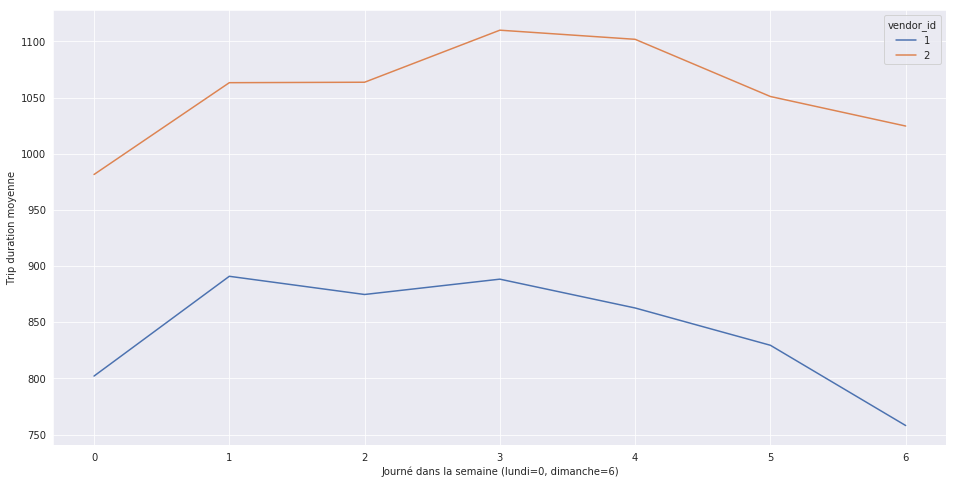

In [29]:
train.groupby(['vendor_id','dayofweek'])['trip_duration'].agg("mean").unstack(level=0).plot()
plt.xlabel("Journé dans la semaine (lundi=0, dimanche=6)")
plt.ylabel("Trip duration moyenne");

> Dans la semaine, le vendor 2 a la moyenne de trip duration plus de vendor 1

> Jeudi et Vendredi contienne de longue trajet pour le vendor 2, pour le vendor 1 est le mardi et jeudi

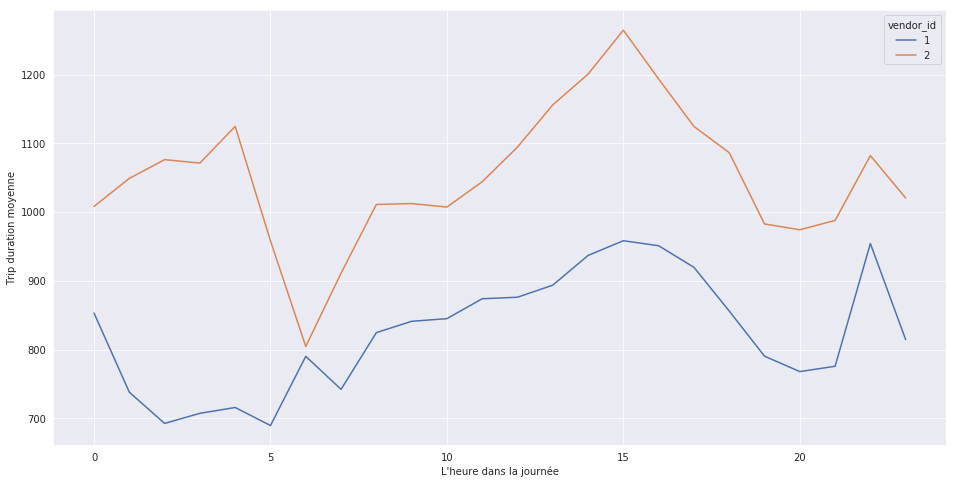

In [30]:
train.groupby(['vendor_id','hour'])['trip_duration'].agg("mean").unstack(level=0).plot()
plt.xlabel("L'heure dans la journée")
plt.ylabel("Trip duration moyenne");

> De 6h du matin à 15h l'aprè midi, trip duration est augmenté

## - Pour la distance:

In [31]:
train['dist_long'] = train['pickup_longitude'] - train['dropoff_longitude']

train['dist_lat'] = train['pickup_latitude'] - train['dropoff_latitude']

train['dist'] = np.sqrt(np.square(train['dist_long']) + np.square(train['dist_lat']))

In [32]:
#### spatial features: count and speed
train['pickup_longitude_bin'] = np.round(train['pickup_longitude'], 2)
train['pickup_latitude_bin'] = np.round(train['pickup_latitude'], 2)
train['dropoff_longitude_bin'] = np.round(train['dropoff_longitude'], 2)
train['dropoff_latitude_bin'] = np.round(train['dropoff_latitude'], 2)

## Data ingeneering on data test

In [33]:
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
test['month'] = test['pickup_datetime'].dt.month
test['day'] = test['pickup_datetime'].dt.day
test['dayofweek'] = test['pickup_datetime'].dt.dayofweek
test['weekday'] = test['pickup_datetime'].dt.weekday
test['hour'] = test['pickup_datetime'].dt.hour
test['minute'] = test['pickup_datetime'].dt.minute

In [34]:
test['dist_long'] = test['pickup_longitude'] - test['dropoff_longitude']
test['dist_lat'] = test['pickup_latitude'] - test['dropoff_latitude']
test['dist'] = np.sqrt(np.square(test['dist_long']) + np.square(test['dist_lat']))

In [35]:
test['pickup_longitude_bin'] = np.round(test['pickup_longitude'], 2)
test['pickup_latitude_bin'] = np.round(test['pickup_latitude'], 2)
test['dropoff_longitude_bin'] = np.round(test['dropoff_longitude'], 2)
test['dropoff_latitude_bin'] = np.round(test['dropoff_latitude'], 2)

In [36]:
## count features
a = pd.concat([train,test]).groupby(['pickup_longitude_bin', 'pickup_latitude_bin']).size().reset_index()
b = pd.concat([train,test]).groupby(['dropoff_longitude_bin', 'dropoff_latitude_bin']).size().reset_index()

train = pd.merge(train, a, on = ['pickup_longitude_bin', 'pickup_latitude_bin'], how = 'left')
test = pd.merge(test, a, on = ['pickup_longitude_bin', 'pickup_latitude_bin'], how = 'left')

train = pd.merge(train, b, on = ['dropoff_longitude_bin', 'dropoff_latitude_bin'], how = 'left')
test = pd.merge(test, b, on = ['dropoff_longitude_bin', 'dropoff_latitude_bin'], how = 'left')

## speed features
train['speed'] = 100000*train['dist'] / train['trip_duration']

a = train[['speed', 'pickup_longitude_bin', 'pickup_latitude_bin']].groupby(['pickup_longitude_bin', 'pickup_latitude_bin']).mean().reset_index()
a = a.rename(columns = {'speed': 'ave_speed'})
b = train[['speed', 'dropoff_longitude_bin', 'dropoff_latitude_bin']].groupby(['dropoff_longitude_bin', 'dropoff_latitude_bin']).mean().reset_index()
b = b.rename(columns = {'speed': 'ave_speed'})

train = pd.merge(train, a, on = ['pickup_longitude_bin', 'pickup_latitude_bin'], how = 'left')
test = pd.merge(test, a, on = ['pickup_longitude_bin', 'pickup_latitude_bin'], how = 'left')

train = pd.merge(train, b, on = ['dropoff_longitude_bin', 'dropoff_latitude_bin'], how = 'left')
test = pd.merge(test, b, on = ['dropoff_longitude_bin', 'dropoff_latitude_bin'], how = 'left')

## drop bins
train = train.drop(['speed', 'pickup_longitude_bin', 'pickup_latitude_bin', 'dropoff_longitude_bin', 'dropoff_latitude_bin'], axis = 1)
test = test.drop(['pickup_longitude_bin', 'pickup_latitude_bin', 'dropoff_longitude_bin', 'dropoff_latitude_bin'], axis = 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
#### weather data
weather = pd.read_csv('../input/knycmetars2016/KNYC_Metars.csv')
weather['Time'] = pd.to_datetime(weather['Time'])
weather['year'] = weather['Time'].dt.year
weather['month'] = weather['Time'].dt.month
weather['day'] = weather['Time'].dt.day
weather['hour'] = weather['Time'].dt.hour
weather = weather[weather['year'] == 2016]

train = pd.merge(train, weather[['Temp.', 'month', 'day', 'hour']], on = ['month', 'day', 'hour'], how = 'left')
test = pd.merge(test, weather[['Temp.', 'month', 'day', 'hour']], on = ['month', 'day', 'hour'], how = 'left')

In [38]:
# export data training and data testing
train.to_csv("training_data.csv", index=False)
test.to_csv("testing_data.csv", index=False)

In [39]:
col_diff = list(set(train.columns).difference(set(test.columns)))
print(f"La différence de la variable entre data training et data testing:\
{set(train.columns).difference(set(test.columns))}")

La différence de la variable entre data training et data testing:{'trip_duration', 'log_trip_duration', 'dropoff_datetime'}
